# CAMBIO DE TRABAJO DE LOS CIENTIFICOS DE DATOS 

# HR Analytics: Job Change of Data Scientists

### Enlace

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

### Descripcion del Dataset

Una empresa activa en Big Data y Data Science quiere contratar científicos de datos entre las personas que superan con éxito algunos cursos que imparte la empresa. Mucha gente se apunta a su formación. La empresa quiere saber cuáles de estos candidatos realmente quieren trabajar para la empresa después de formarse o buscar un nuevo empleo porque ayuda a reducir el costo y el tiempo, así como la calidad de la formación o la planificación de los cursos y la categorización de los candidatos. La información relacionada con la demografía, la educación y la experiencia está en manos de la inscripción y la inscripción de los candidatos.
Este conjunto de datos está diseñado para comprender los factores que llevan a una persona a dejar su trabajo actual para dedicarse también a investigaciones de recursos humanos. Por modelo (s) que utiliza las credenciales actuales, datos demográficos y datos de experiencia, podrá predecir la probabilidad de que un candidato busque un nuevo trabajo o trabaje para la empresa, además de interpretar los factores afectados en la decisión del empleado.


### Objetivo

Predecir la probabilidad de que un candidato trabaje para la empresa.

### Variables

enrollee_id: ID único del candidato.

city: Código de ciudad.

city_ development _index: Índice de desarrollo de la ciudad (escalado).

gender: Género del candidato

relevent_experience: Experiencia relevante del candidato

enrolled_university: Tipo de curso universitario inscrito, si lo hubiera

education_level: Nivel de educación del candidato

major_discipline: Educación disciplina principal del candidato

experience: Experiencia total del candidato en años

company_size: Número de empleados en la empresa del empleador actual

company_type: Tipo de compañia actual

lastnewjob: Diferencia en años entre el trabajo anterior y el trabajo actual

training_hours: Horas de formación completadas

target: 0 - No busca un cambio de trabajo, 1 - Busca un cambio de trabajo

### Importar los Datos

Importamos las principales librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Leemos el Dataset

In [5]:
data = pd.read_csv('aug_train.csv')

### Analisis del Dataset

Obtenemos el numero de filas y columnas del dataset

In [6]:
data.shape

(19158, 14)

Vemos los primeros datos del dataset

In [7]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Obtenemos informacion del dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


Notamos que el conjunto de datos está desequilibrado, entonces, vemos el porcentaje de los valores faltantes

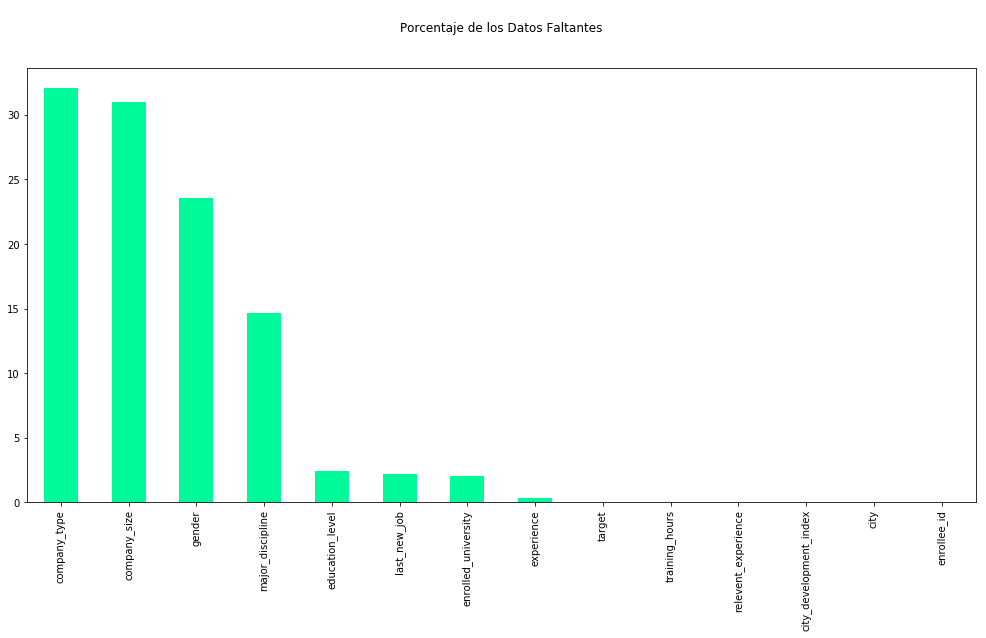

In [9]:
missing = 100 * data.isna().sum().sort_values(ascending=False) / data.shape[0]
missing.plot(kind='bar', color="mediumspringgreen", figsize=(17,8))
plt.title("\nPorcentaje de los Datos Faltantes\n\n")
plt.show()

Contamos el numero de valores unicos

In [10]:
for col in data.columns:
    print(f"\n\nNumero de valores unicos en la columna {col}:\n")
    print(len(data[col].unique()))



Numero de valores unicos en la columna enrollee_id:

19158


Numero de valores unicos en la columna city:

123


Numero de valores unicos en la columna city_development_index:

93


Numero de valores unicos en la columna gender:

4


Numero de valores unicos en la columna relevent_experience:

2


Numero de valores unicos en la columna enrolled_university:

4


Numero de valores unicos en la columna education_level:

6


Numero de valores unicos en la columna major_discipline:

7


Numero de valores unicos en la columna experience:

23


Numero de valores unicos en la columna company_size:

9


Numero de valores unicos en la columna company_type:

7


Numero de valores unicos en la columna last_new_job:

7


Numero de valores unicos en la columna training_hours:

241


Numero de valores unicos en la columna target:

2


### Preprocesamiento

Eliminamos la primera columna ya que tiene un valor muy alejado a las otras y no es relevante para nuestro estudio

In [11]:
data.drop("enrollee_id", axis=1, inplace=True)

In [12]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Trabajamos con los datos de la columna city contando las ocurrencias de estos en el dataframe

In [13]:
data_one = data[data["target"]==1]
d = {}
for city in data["city"].unique():
    d[city] = 100 * data_one[data_one["city"]==city].shape[0] / data[data["city"]==city].shape[0]
for i in range(data.shape[0]):
    city = data.loc[i,"city"]
    data.loc[i,"city"] = d[city]

In [14]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,21.3088,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,14.7059,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,59.1044,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,38.8889,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,28.9062,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Reemplazamos los valores Nan con el valor de moda

In [15]:
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

Comprobamos el numero de valores faltantes de los datos

In [16]:
data.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [17]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,21.308840,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,14.705882,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,59.104367,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,38.888889,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,28.906250,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Realizamos el preprocesamiento de codificacion

In [18]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in data.columns:
    data[col] = enc.fit_transform(data[col])

In [19]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,47,85,1,0,2,0,5,21,4,5,0,35,1
1,32,48,1,1,2,0,5,6,4,5,4,46,0
2,90,14,1,1,0,0,5,15,4,5,5,82,0
3,78,52,1,1,2,0,1,20,4,5,5,51,1
4,66,45,1,0,2,2,5,21,4,1,3,7,0


Dividimos el dataframe en variables independientes y la variable dependiente

In [20]:
x = data.drop("target", axis=1)
y = data["target"]

Realizamos el preprocesamiento de impugnacion de valores NaN

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x)
SimpleImputer()
imputer.transform(x)

array([[ 47.,  85.,   1., ...,   5.,   0.,  35.],
       [ 32.,  48.,   1., ...,   5.,   4.,  46.],
       [ 90.,  14.,   1., ...,   5.,   5.,  82.],
       ...,
       [ 47.,  85.,   1., ...,   5.,   3.,  43.],
       [ 27.,  56.,   1., ...,   5.,   1.,  95.],
       [ 24.,  67.,   1., ...,   5.,   0., 124.]])

Dividimos las matrices en datos para entrenar y para testear 

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Realizamos el preprocesamiento de estandarizacion de los datos de entrenamiento y test

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xtrain)
xtrain = ss.transform(xtrain)
xtest = ss.transform(xtest)

C:\Users\Ronald\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ronald\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Ronald\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """


### Aplicando PCA (Analisis del Componente Principal)

Aplicamos PCA para 12 Columnas

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
trans_xtrain=pca.fit_transform(xtrain)
trans_xtest=pca.transform(xtest)

Aplicando Regresion Logistica

In [26]:
from sklearn.linear_model import LogisticRegression
clasificador=LogisticRegression(random_state=0)
clasificador.fit(trans_xtrain,ytrain)
ypred_train=clasificador.predict(trans_xtrain)
ypred_test=clasificador.predict(trans_xtest)

C:\Users\Ronald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hallamos la Matriz de Confusion

In [27]:
from sklearn.metrics import confusion_matrix
print("Matriz de Confusion:\n")
print("Resultados de Entrenamiento:\n")
matriz1=confusion_matrix(ytrain, ypred_train)
print(matriz1)
print("\n\nResultados de Prueba:\n")
matriz1=confusion_matrix(ytest, ypred_test)
print(matriz1)

Matriz de Confusion:

Resultados de Entrenamiento:

[[10649   876]
 [ 2561  1240]]


Resultados de Prueba:

[[2635  221]
 [ 679  297]]


Reporte de Metricas de Clasificacion

In [29]:
from sklearn.metrics import classification_report
print("Resultados de Entrenamiento:\n")
print(classification_report(ytrain, ypred_train))
print("\n\nResultados de Prueba:\n")
print(classification_report(ytest, ypred_test))

Resultados de Entrenamiento:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     11525
           1       0.59      0.33      0.42      3801

   micro avg       0.78      0.78      0.78     15326
   macro avg       0.70      0.63      0.64     15326
weighted avg       0.75      0.78      0.75     15326



Resultados de Prueba:

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2856
           1       0.57      0.30      0.40       976

   micro avg       0.77      0.77      0.77      3832
   macro avg       0.68      0.61      0.63      3832
weighted avg       0.74      0.77      0.74      3832



Aplicamos PCA para 10 Columnas

In [31]:
pca=PCA(n_components=10)
trans_xtrain=pca.fit_transform(xtrain)
trans_xtest=pca.transform(xtest)

Aplicando Regresion Logistica

In [33]:
clasificador=LogisticRegression(random_state=0)
clasificador.fit(trans_xtrain,ytrain)
ypred_train=clasificador.predict(trans_xtrain)
ypred_test=clasificador.predict(trans_xtest)

C:\Users\Ronald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hallamos la Matriz de Confusion

In [35]:
print("Matriz de Confusion:\n")
print("Resultados de Entrenamiento:\n")
matriz2=confusion_matrix(ytrain, ypred_train)
print(matriz2)
print("\n\nResultados de Prueba:\n")
matriz2=confusion_matrix(ytest, ypred_test)
print(matriz2)

Matriz de Confusion:

Resultados de Entrenamiento:

[[10624   901]
 [ 2556  1245]]


Resultados de Prueba:

[[2633  223]
 [ 672  304]]


Reporte de Metricas de Clasificacion

In [36]:
print("Reporte indices de Precision:\n")
print("Resultados de Entrenamiento:\n")
print(classification_report(ytrain, ypred_train))
print("\n\nResultados de Prueba:\n")
print(classification_report(ytest, ypred_test))

Reporte indices de Precision:

Resultados de Entrenamiento:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     11525
           1       0.58      0.33      0.42      3801

   micro avg       0.77      0.77      0.77     15326
   macro avg       0.69      0.62      0.64     15326
weighted avg       0.75      0.77      0.75     15326



Resultados de Prueba:

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2856
           1       0.58      0.31      0.40       976

   micro avg       0.77      0.77      0.77      3832
   macro avg       0.69      0.62      0.63      3832
weighted avg       0.74      0.77      0.74      3832



Aplicamos PCA para 8 Columnas

In [38]:
pca=PCA(n_components=8)
trans_xtrain=pca.fit_transform(xtrain)
trans_xtest=pca.transform(xtest)

Aplicando Regresion Logistica

In [40]:
clasificador=LogisticRegression(random_state=0)
clasificador.fit(trans_xtrain,ytrain)
ypred_train=clasificador.predict(trans_xtrain)
ypred_test=clasificador.predict(trans_xtest)

C:\Users\Ronald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hallamos la Matriz de Confusion

In [42]:
print("Matriz de Confusion:\n")
print("Resultados de Entrenamiento:\n")
matriz3=confusion_matrix(ytrain, ypred_train)
print(matriz3)
print("\n\nResultados de Prueba:\n")
matriz3=confusion_matrix(ytest, ypred_test)
print(matriz3)

Matriz de Confusion:

Resultados de Entrenamiento:

[[10609   916]
 [ 2556  1245]]


Resultados de Prueba:

[[2627  229]
 [ 659  317]]


Reporte de Metricas de Clasificacion

In [44]:
print("Reporte indices de Precision:\n")
print("Resultados de Entrenamiento:\n")
print(classification_report(ytrain, ypred_train))
print("\n\nResultados de Prueba:\n")
print(classification_report(ytest, ypred_test))

Reporte indices de Precision:

Resultados de Entrenamiento:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     11525
           1       0.58      0.33      0.42      3801

   micro avg       0.77      0.77      0.77     15326
   macro avg       0.69      0.62      0.64     15326
weighted avg       0.75      0.77      0.75     15326



Resultados de Prueba:

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2856
           1       0.58      0.32      0.42       976

   micro avg       0.77      0.77      0.77      3832
   macro avg       0.69      0.62      0.64      3832
weighted avg       0.74      0.77      0.74      3832



Aplicamos PCA para 5 Columnas

In [45]:
pca=PCA(n_components=5)
trans_xtrain=pca.fit_transform(xtrain)
trans_xtest=pca.transform(xtest)

Aplicando Regresion Logistica

In [46]:
clasificador=LogisticRegression(random_state=0)
clasificador.fit(trans_xtrain,ytrain)
ypred_train=clasificador.predict(trans_xtrain)
ypred_test=clasificador.predict(trans_xtest)

C:\Users\Ronald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hallamos la Matriz de Confusion

In [48]:
print("Matriz de Confusion:\n")
print("Resultados de Entrenamiento:\n")
matriz4=confusion_matrix(ytrain, ypred_train)
print(matriz4)
print("\n\nResultados de Prueba:\n")
matriz4=confusion_matrix(ytest, ypred_test)
print(matriz4)

Matriz de Confusion:

Resultados de Entrenamiento:

[[10644   881]
 [ 2639  1162]]


Resultados de Prueba:

[[2632  224]
 [ 672  304]]


Reporte de Metricas de Clasificacion

In [49]:
print("Reporte indices de Precision:\n")
print("Resultados de Entrenamiento:\n")
print(classification_report(ytrain, ypred_train))
print("\n\nResultados de Prueba:\n")
print(classification_report(ytest, ypred_test))

Reporte indices de Precision:

Resultados de Entrenamiento:

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     11525
           1       0.57      0.31      0.40      3801

   micro avg       0.77      0.77      0.77     15326
   macro avg       0.69      0.61      0.63     15326
weighted avg       0.74      0.77      0.74     15326



Resultados de Prueba:

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2856
           1       0.58      0.31      0.40       976

   micro avg       0.77      0.77      0.77      3832
   macro avg       0.69      0.62      0.63      3832
weighted avg       0.74      0.77      0.74      3832



Aplicamos PCA para 3 Columnas

In [50]:
pca=PCA(n_components=3)
trans_xtrain=pca.fit_transform(xtrain)
trans_xtest=pca.transform(xtest)

Aplicando Regresion Logistica

In [51]:
clasificador=LogisticRegression(random_state=0)
clasificador.fit(trans_xtrain,ytrain)
ypred_train=clasificador.predict(trans_xtrain)
ypred_test=clasificador.predict(trans_xtest)

C:\Users\Ronald\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Hallamos la Matriz de Confusion

In [52]:
print("Matriz de Confusion:\n")
print("Resultados de Entrenamiento:\n")
matriz5=confusion_matrix(ytrain, ypred_train)
print(matriz5)
print("\n\nResultados de Prueba:\n")
matriz5=confusion_matrix(ytest, ypred_test)
print(matriz5)

Matriz de Confusion:

Resultados de Entrenamiento:

[[10704   821]
 [ 2722  1079]]


Resultados de Prueba:

[[2660  196]
 [ 707  269]]


Reporte de Metricas de Clasificacion

In [53]:
print("Reporte indices de Precision:\n")
print("Resultados de Entrenamiento:\n")
print(classification_report(ytrain, ypred_train))
print("\n\nResultados de Prueba:\n")
print(classification_report(ytest, ypred_test))

Reporte indices de Precision:

Resultados de Entrenamiento:

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     11525
           1       0.57      0.28      0.38      3801

   micro avg       0.77      0.77      0.77     15326
   macro avg       0.68      0.61      0.62     15326
weighted avg       0.74      0.77      0.74     15326



Resultados de Prueba:

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2856
           1       0.58      0.28      0.37       976

   micro avg       0.76      0.76      0.76      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.76      0.73      3832

